# Phys 581 Winter 2019
# Assignment #6: Spectrograph
## Alexander Hickey, 10169582

Note that the contents of this notebook were created and tested in a 64-bit distribution of Windows 10, using Python 3.6.8.

In [1]:
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]'

In [2]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

Much of experimental science relies on the precise control of instrumentation and reliable acquisition of data. With many implementations of robust instruments however, one is required to manually interface with the instruments CPU. In some sense, this makes the device more versatile, however, it requires the user to understand many technical details of the device that would otherwise be irrelevant. It is therefore the case that one might benefit from streamlining the acquisition of data by hiding these technical details with a task-specific user interface.

A graphical user interface (GUI) is a user interface that allows users to control electronic devices through graphical icons and visual indicators, instead of text-based user interfaces such as the command line. Such an interface is useful to avoid the often steep learning curve required to interact with command-line interfaces.

The Ocean Optics USB2000+ spectrometer is a general-purpose UV-Visible-Infrared spectrometer for absorption, transmission, reflectance, emission, color and other applications.For more details of the product see https://oceanoptics.com/product/usb2000-custom/ . SeaBreeze is a device driver library that provides an interface to Ocean Optics spectrometers. It is written in C/C++ and builds and runs on Windows, MacOSX, and Linux (x86/x64/ARM). While this library is well documented, we are interested in developing an interface that can be downloaded and used immediately, to avoid the assumption that every user speaks C/C++.

This notebook presents the construction of a simple GUI that interfaces and collects data from the Ocean Optics USB2000+ spectrograph. This GUI is developed using the Tkinter library in Python. The GUI will allow a user to collect data from the spectrograph with the click of a button, and display this data on screen in a window.

### Interfacing with the spectrometer

To interface with the spectrometer in Python, we will avoid the direct use of the SeaBreeze drivers by making use of the interface developed by Andreas Poehlmann, available at:

    https://github.com/ap--/python-seabreeze 

This module is available in the anaconda package framework, and can be installed using:

    conda install -c poehlmann python-seabreeze
    
We begin by interfacing with the spectrometer in Python to develop a function that can call the data acquisition process. In windows, driver files for the spectrometer must be installed manually. To do this, plug in the spectrometer, right click the device in the toolbar and click update driver software. Then choose the suitable driver from the extracted folder, that can be downloaded here: https://github.com/ap--/python-seabreeze/blob/master/misc/windows-driver-files.zip .

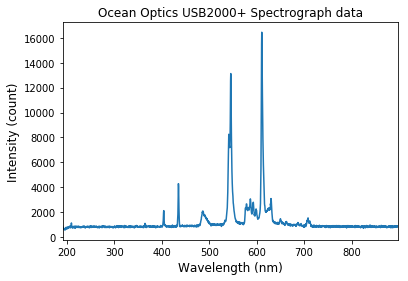

In [3]:
#Import python interface
import seabreeze.spectrometers as sb

#Interface to spectrometer, set integration time in microseconds
spec = sb.Spectrometer.from_serial_number()
spec.integration_time_micros(20000)

#Extract current wavelength/intensity data
#Start from 3rd data point to remove dark counts
wlength = spec.wavelengths()[2:]
intensity = spec.intensities()[2:]

#Close session
spec.close()

#Plot measurement
plt.plot(wlength,intensity)
plt.xlim(np.min(wlength),np.max(wlength))
plt.title('Ocean Optics USB2000+ Spectrograph data', fontsize=12)
plt.xlabel('Wavelength (nm)',fontsize = 12)
plt.ylabel('Intensity (count)',fontsize = 12)

plt.show()

The data collected above corresponds to the ambient room lighting.

### Designing the GUI

Now that the spectrograph has been successfully interfaced in Python, the remainder of this work relies on the design of the GUI. This is done with the tools available in the Tkinter library. The features of this GUI are outlined here, and the full code can be found in the included spectrographGUI.py file. The interface includes a button that will collect and update a plot with the current spectrograph data, as well as a text box to change the integration time. Additionally, the matplotlib toolbar was added to allow for a user to navigate through, zoom in on, and save the current plot. Several screenshots of the application for various data sets is shown below.

The first image corresponds to a measurement of my laptop screen.

<img src="laptop_screen.JPG" width="500">

Interestingly, we see three distinct peaks in the spectrum, which most likely correspond to the RGB colour scheme being emitted by the pixels of the screen. The next spectrum corresponds to the moniter for my desktop computer.

<img src="desktop_screen.JPG" width="500">

As we see, my desktop moniter almost matches up with the spectrum of my laptop screen, however, the red peak is strongly supressed. This could be because my moniter is much older than my laptop, suggesting that the red component of each pixel has weakened over time. Finally, I measured the spectrum of my desk lamp.

<img src="desk_lamp.JPG" width="500">

This kind of broad spectrum is expected, as the lamp emits seemingly white light.

### Conclusion

In this notebook, we looked at the construction of a simple GUI that interfaces and collects data from the Ocean Optics USB2000+ spectrograph. The GUI was developed using the Tkinter library in Python, and allows the user to collect data from the spectrograph with the click of a button, and display this data on screen in a window. Additional features were included to vary the integration time for each collection, as well as to manipulate and save the plots.

With more time, additional features could be added to increase the versatility of the application. Implementing a slider as opposed to a text box could restrict the user from inputting an invalid integration time. Additionally, it would be interesting to implement a live plotting feature, which would display the data in real time from the spectrograph.